In [1]:
from keras.datasets import mnist

In [1]:
from PIL import Image
import glob
import os
import numpy as np
import random
import functools as ft
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib notebook
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [3]:
DIR = (r'C:\Users\zhou yiqi\Desktop\EE5907_CA2\PIE')
count = 0 #resetting
count_test = 0                           #This cell is setting up the training sets and test sets so as to facilitate the 
y_train = np.array([])                   # convolutional neutral network analysis.
y_test = np.array([])
for i in np.arange(1,25):
    path = os.path.join(DIR, str(i)) #get all the available 68 subjects
    dirs = os.listdir(path)
    random.shuffle(dirs)     
    for item in dirs[0:20]:    
        image = Image.open(os.path.join(path, str(item)))
        image_array = np.array(image)
        image_array = image_array / 255
        count += 1
        y_train = np.append(y_train,[i-1], axis = 0)
        if count == 1:
            total_array = image_array
        else:
            total_array = np.append(total_array,image_array, axis = 0)
            
    for item in dirs[20:71]:
    
        image = Image.open(os.path.join(path, str(item)))
        image_array = np.array(image) 
        image_array = image_array / 255##this one is talking about one folder you open up how many images
        count_test += 1
        y_test = np.append(y_test,[i-1], axis = 0)
        if count_test == 1:
            total_array_test = image_array        
        else:
            total_array_test = np.append(total_array_test,image_array, axis = 0)

path = (r'C:\Users\zhou yiqi\Desktop\EE5907_CA2\PIE\25')
dirs = os.listdir(path)
random.shuffle(dirs)

for item in dirs[0:13]:
    
    image = Image.open(os.path.join(path, str(item)))
    image_array = np.array(image) 
    image_array = image_array / 255##this one is talking about one folder you open up how many images
    total_array = np.append(total_array,image_array, axis = 0)
    y_train = np.append(y_train,[24], axis = 0)
    
for item in dirs[13:64]:
    
    image = Image.open(os.path.join(path, str(item)))
    image_array = np.array(image) 
    image_array = image_array / 255##this one is talking about one folder you open up how many images
    total_array_test = np.append(total_array_test,image_array, axis = 0)
    y_test = np.append(y_test,[24], axis = 0)
    
path = (r'C:\Users\zhou yiqi\Desktop\EE5907_CA2\Yidi\Yidi_Grey')
dirs = os.listdir(path)
random.shuffle(dirs)

for item in dirs[0:7]:
    
    image = Image.open(os.path.join(path, str(item)))
    image_array = np.array(image) 
    image_array = image_array / 255##this one is talking about one folder you open up how many images
    total_array = np.append(total_array,image_array, axis = 0)
    y_train = np.append(y_train,[25], axis = 0)
    

for item in dirs[7:]:
    
    image = Image.open(os.path.join(path, str(item)))
    image_array = np.array(image)
    image_array = image_array / 255##this one is talking about one folder you open up how many images
    total_array_test = np.append(total_array_test,image_array, axis = 0)
    y_test = np.append(y_test,[25], axis = 0)

total_array = np.reshape(total_array,(500,32,32))
print(total_array.shape)
total_array_test = np.reshape(total_array_test,(1278,32,32))
print(total_array_test.shape)
total_array = total_array.reshape(500,32,32,1)
total_array_test = total_array_test.reshape(1278,32,32,1)
print(total_array.shape)
print(total_array_test.shape)
print(y_train)
print(len(y_train))
print(y_test)
print(len(y_test))


(500, 32, 32)
(1278, 32, 32)
(500, 32, 32, 1)
(1278, 32, 32, 1)
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.
  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  5.  5.  5.  5.  5.  5.  5.  5.
  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  6.  6.  6.  6.  6.  6.
  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  7.  7.  7.  7.
  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  8.  8.
  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.
  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.
  9.  9. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11.

Epoch 1/20
16/16 [==============================] - 2s 41ms/step - loss: 3.2646 - accuracy: 0.0340 - val_loss: 3.2430 - val_accuracy: 0.0595
Epoch 2/20
16/16 [==============================] - 0s 27ms/step - loss: 3.2205 - accuracy: 0.0580 - val_loss: 3.1781 - val_accuracy: 0.1244
Epoch 3/20
16/16 [==============================] - 0s 26ms/step - loss: 3.1532 - accuracy: 0.1380 - val_loss: 3.0634 - val_accuracy: 0.1275
Epoch 4/20
16/16 [==============================] - 0s 26ms/step - loss: 2.9715 - accuracy: 0.1320 - val_loss: 2.8882 - val_accuracy: 0.1831
Epoch 5/20
16/16 [==============================] - 0s 26ms/step - loss: 2.7318 - accuracy: 0.2140 - val_loss: 2.7016 - val_accuracy: 0.2637
Epoch 6/20
16/16 [==============================] - 0s 30ms/step - loss: 2.4345 - accuracy: 0.3300 - val_loss: 2.3241 - val_accuracy: 0.2934
Epoch 7/20
16/16 [==============================] - 0s 26ms/step - loss: 1.9045 - accuracy: 0.4640 - val_loss: 1.8532 - val_accuracy: 0.4617
Epoch 8/20
16

<IPython.core.display.Javascript object>


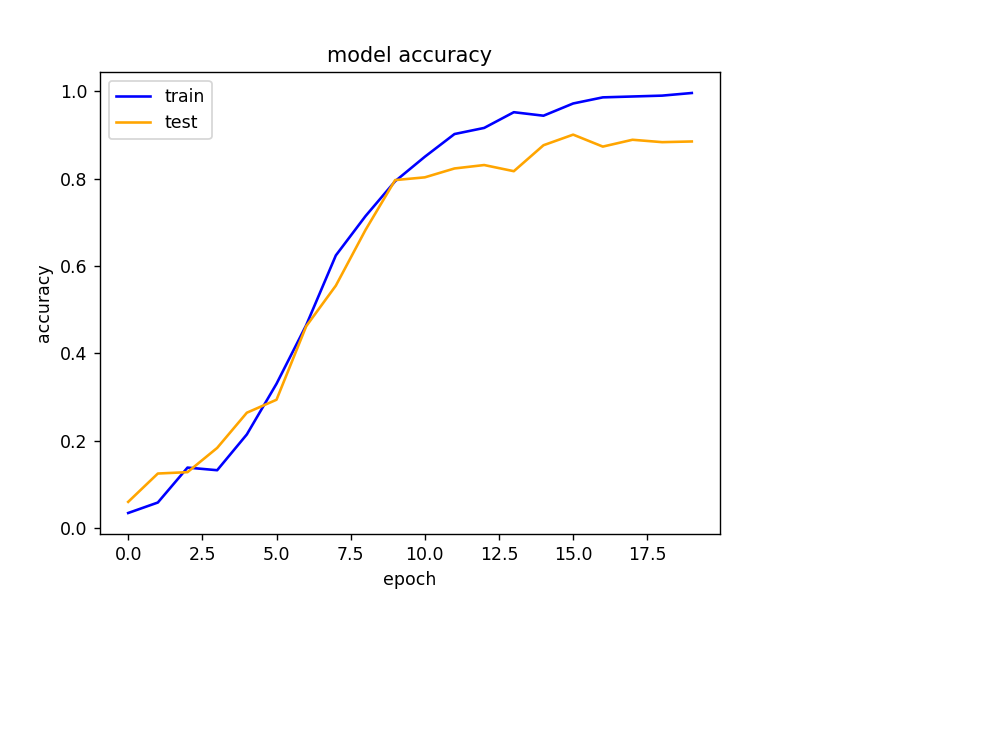

In [4]:
cnn = models.Sequential([
    layers.Conv2D(filters=20, kernel_size=5, activation='relu', input_shape=(32, 32, 1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=50, kernel_size=5, activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(500, activation='relu'),
    layers.Dense(26, activation='softmax')
]) # For this cell, the convolutional neural network construction is quite straightforward with the use of tensorflow. Such a
# neural network is done through setting the layers with max pooling, parameters are set based on the assignment question.
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']) #compiling the neural network

history = cnn.fit(total_array, y_train, epochs=20, validation_data=(total_array_test, y_test), verbose=1) #training the CNN
                  #validation_data=(total_array_test, y_test)
validation = cnn.evaluate(total_array_test,y_test) #getting the classification accuracy for CNN.
#print(history.history.keys())
#print(validation.history.keys())
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')
plt.title('model accuracy') #Plot for model accuracy. There are two plots one is for training and one is for test.
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()
#plt.plot(history.history['val_accuracy'])

In [5]:
#print(cnn.history)
#plt.plot(cnn['accuracy'])
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


<IPython.core.display.Javascript object>


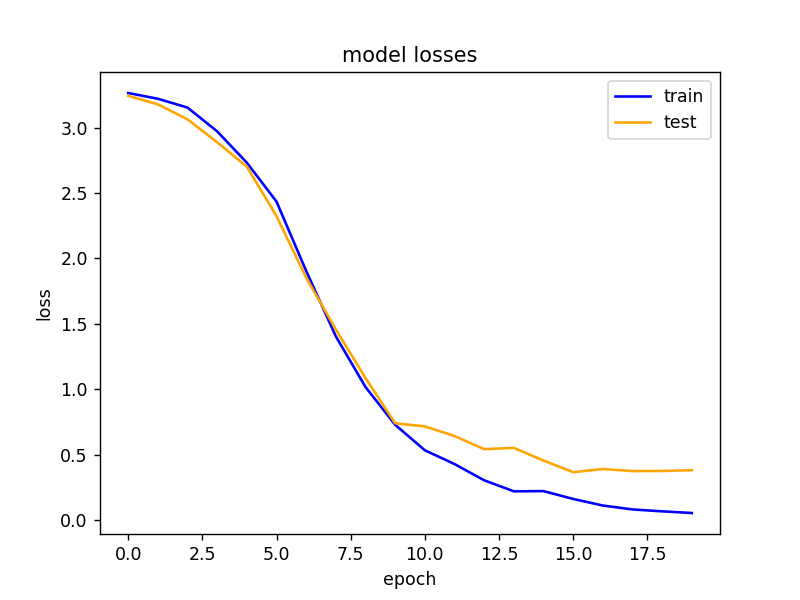

In [6]:
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
plt.title('model losses') #Plot for model loss. There are 2 plots, one is for training and one is for test. 
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()